## Preparing notebook

In [1]:
!pip install gymnasium[toy-text]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 71.4 MB/s eta 0:00:00


## Import Libraries 

In [2]:
import numpy as np
import gymnasium as gym
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Load invironment

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
observation, _ = env.reset()

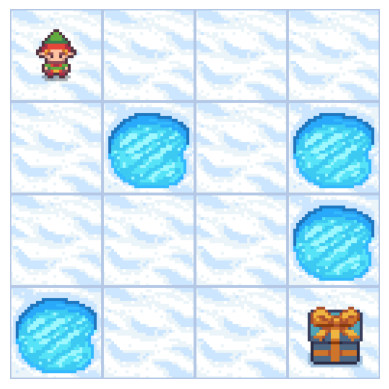

In [5]:
plt.imshow(env.render())
plt.axis('off');

## Do game with random action

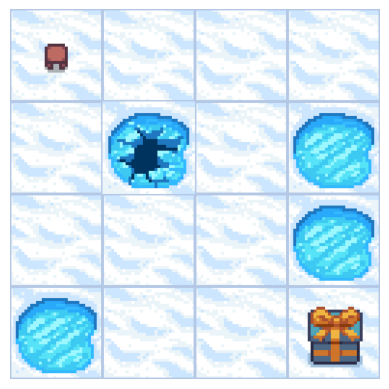

In [6]:
state = env.reset()[0]
plt.imshow(env.render())
plt.axis('off')
plt.show();
sleep(4)
done = False
epochs, reward = 0, 0
while not done:
    action = env.action_space.sample()
    state, reward, done, _, _ = env.step(action)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show();
    sleep(0.5)

## Implement q-learning algorithm

In [7]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
alpha, gamma, epsillon = 0.8, 0.95, 0.1
for i in range(50000):
    state = env.reset()[0]
    epochs, reward = 0, 0, 
    done = False
    while not done:
        if np.random.uniform(0, 1) < epsillon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        old_value = q_table[state, action]
        next_state, reward, done, _, _ = env.step(action)
        next_max = np.max(q_table[next_state])
        q_table[state, action] = alpha * old_value + (1 - alpha) * (reward + gamma * next_max)
        state = next_state
        epochs += 1
        if i%10 == 0:
            print('Episode:', i)
            print('Epochs:', epochs)

Episode: 0
Epochs: 1
Episode: 0
Epochs: 2
Episode: 10
Epochs: 1
Episode: 10
Epochs: 2
Episode: 10
Epochs: 3
Episode: 10
Epochs: 4
Episode: 10
Epochs: 5
Episode: 20
Epochs: 1
Episode: 20
Epochs: 2
Episode: 20
Epochs: 3
Episode: 20
Epochs: 4
Episode: 20
Epochs: 5
Episode: 20
Epochs: 6
Episode: 20
Epochs: 7
Episode: 20
Epochs: 8
Episode: 20
Epochs: 9
Episode: 20
Epochs: 10
Episode: 20
Epochs: 11
Episode: 20
Epochs: 12
Episode: 20
Epochs: 13
Episode: 20
Epochs: 14
Episode: 20
Epochs: 15
Episode: 20
Epochs: 16
Episode: 20
Epochs: 17
Episode: 20
Epochs: 18
Episode: 20
Epochs: 19
Episode: 20
Epochs: 20
Episode: 20
Epochs: 21
Episode: 20
Epochs: 22
Episode: 20
Epochs: 23
Episode: 20
Epochs: 24
Episode: 30
Epochs: 1
Episode: 30
Epochs: 2
Episode: 30
Epochs: 3
Episode: 30
Epochs: 4
Episode: 30
Epochs: 5
Episode: 40
Epochs: 1
Episode: 40
Epochs: 2
Episode: 40
Epochs: 3
Episode: 40
Epochs: 4
Episode: 50
Epochs: 1
Episode: 50
Epochs: 2
Episode: 50
Epochs: 3
Episode: 50
Epochs: 4
Episode: 50
Epochs:

In [9]:
q_table

array([[0.23127167, 0.18257737, 0.19477726, 0.16060683],
       [0.12718606, 0.09472723, 0.08908599, 0.15689288],
       [0.10797129, 0.12321423, 0.1182676 , 0.10637745],
       [0.05534653, 0.09427828, 0.04516826, 0.12815415],
       [0.27280779, 0.16820886, 0.17747809, 0.11896766],
       [0.        , 0.        , 0.        , 0.        ],
       [0.0796188 , 0.03992644, 0.06984722, 0.01781715],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18147573, 0.20538195, 0.20520777, 0.3675705 ],
       [0.20822079, 0.43626093, 0.22544367, 0.30178423],
       [0.34382938, 0.26775547, 0.21415095, 0.13347873],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.363909  , 0.16005418, 0.4864944 , 0.30239756],
       [0.55489126, 0.68198486, 0.54523932, 0.55497853],
       [0.        , 0.        , 0.        , 0.        ]])

## Do game with q-table

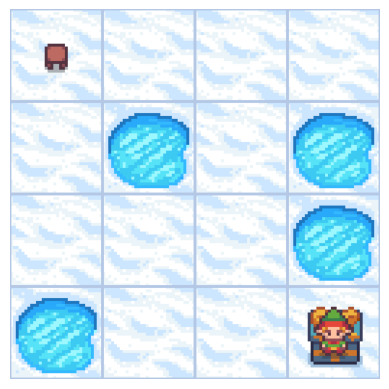

Epochs: 43


In [10]:
state = env.reset()[0]
plt.imshow(env.render())
plt.axis('off')
plt.show();
sleep(4)
done = False
epochs, reward = 0, 0
while not done:
    action = np.argmax(q_table[state])
    state, reward, done, _, _ = env.step(action)
    epochs += 1
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show();
    print('Epochs:', epochs)
    sleep(0.5)